In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

### Function for plotting magnetic field data

In [2]:
def plot_magfield(
    field: np.ndarray,
    vmax: float = 1
) -> None:
    plt.clf()
    labels = ['Bx-field', 'By-field', 'Bz-field']
    nrows = 3 if len(field.shape) == 4 else 1
    fig, axes = plt.subplots(nrows=nrows, ncols=3, sharex=True,
                             sharey=True, figsize=(15,10))
    norm = colors.Normalize(vmin=-vmax, vmax=vmax)

    if len(field.shape) == 3:
        for i, comp in enumerate(field):
            ax = axes.flat[i]
            im = ax.imshow(comp, cmap='bwr', norm=norm, origin="lower")
            ax.set_title(labels[i])

    elif len(field.shape) == 4:
        for i, z in enumerate([0, 1, 2]):
            for j, comp in enumerate(field[:,:,:,z]):
                ax = axes.flat[i * 3 + j]
                im = ax.imshow(comp, cmap='bwr', norm=norm, origin="lower")
                ax.set_title(labels[j] + f'@{z+1}')
    
    else:
        raise NotImplementedError()

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.825, 0.345, 0.015, 0.3])
    fig.colorbar(im, cax=cbar_ax)
    plt.show()

### Function for validation of physicality of magnetic fields

As we define the magnetic fields to have no magnetic sources inside the measurement area, we know that the divergence and curl of true magnetic fields is 0. This can be checked with the following functions.

However, calculating these values for a true 3-D magnetic field, requires a volume of magnetic field measurements, which is given in `magfield_96_3D`.

In [3]:
def curl(field):
    # The magnetic field coming from magtense has
    # y-direction in the first dimension
    # x-compenent in the second dimension
    # Similar to 'xy' indexing in np.meshgrid
    Fx_y = np.gradient(field[0], axis=0)
    Fy_x = np.gradient(field[1], axis=1)

    if field.shape[0]== 3:
        Fx_z = np.gradient(field[0], axis=2)
        Fy_z = np.gradient(field[1], axis=2)
        Fz_x = np.gradient(field[2], axis=1)
        Fz_y = np.gradient(field[2], axis=0)
        # Taking gradients of center layer only
        curl_vec = np.stack([
            Fz_y - Fy_z,
            Fx_z - Fz_x,
            Fy_x - Fx_y], axis=0)[:,:,:,1]
    else:
        curl_vec = Fy_x - Fx_y
    
    return curl_vec


def div(field):
    # The magnetic field coming from magtense has
    # y-direction in the first dimension
    # x-compenent in the second dimension
    # Similar to 'xy' indexing in np.meshgrid
    Fx_x = np.gradient(field[0], axis=1)
    Fy_y = np.gradient(field[1], axis=0)

    if field.shape[0] == 3:
        Fz_z = np.gradient(field[2], axis=2)
        # Taking gradients of center layer only
        div = np.stack([Fx_x, Fy_y, Fz_z], axis=0)[:,:,:,1]
    else:                    
        div = np.stack([Fx_x, Fy_y], axis=0)
    
    return div.sum(axis=0)

### Loading database with magnetic fields

The file `magfield_96.h5` is in [h5py-format](https://docs.h5py.org/en/stable/quick.html).

The numpy array with all the field information is stored in `db['field']`.

In [4]:
db = h5py.File('/home/dlcourse/magfield_96.h5')
print(db['field'][0].shape)

(3, 96, 96)


<Figure size 640x480 with 0 Axes>

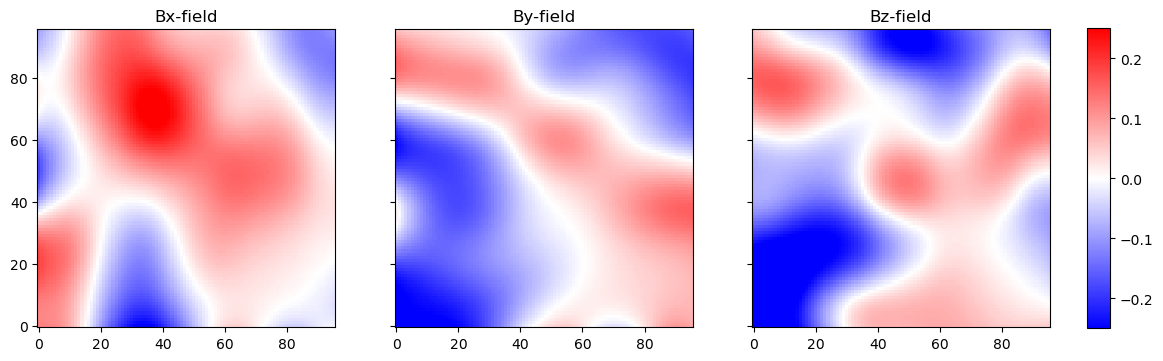

<Figure size 640x480 with 0 Axes>

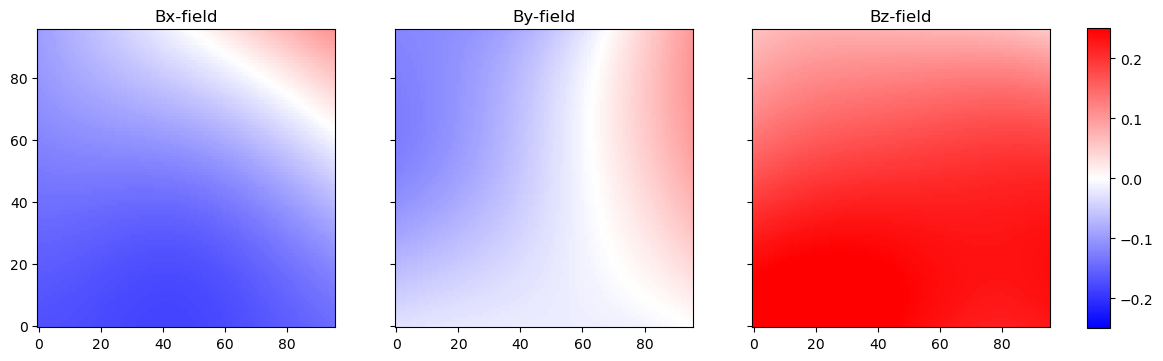

<Figure size 640x480 with 0 Axes>

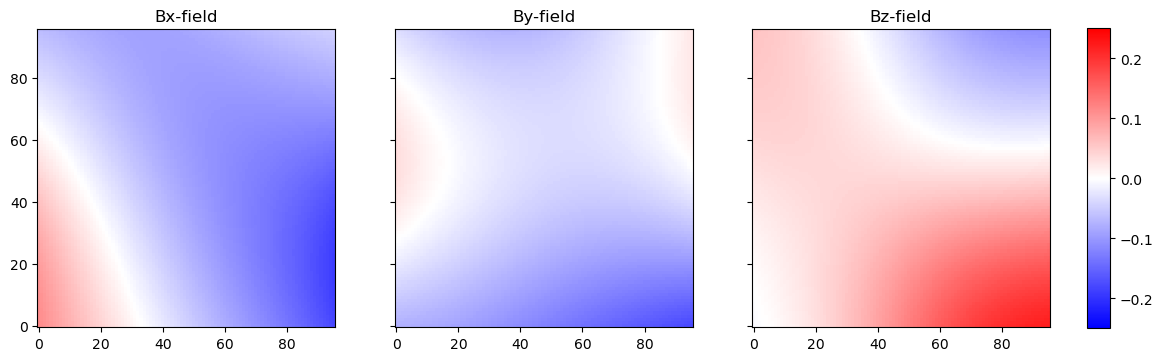

In [5]:
for i in range(3):
    field = db['field'][i]
    plot_magfield(field, vmax=0.25)

### Loading database with volume of magnetic field measurements

In [6]:
db_3D = h5py.File('/home/dlcourse/magfield_96_3D.h5')
print(db_3D['field'][0].shape)

(3, 96, 96, 3)


<Figure size 640x480 with 0 Axes>

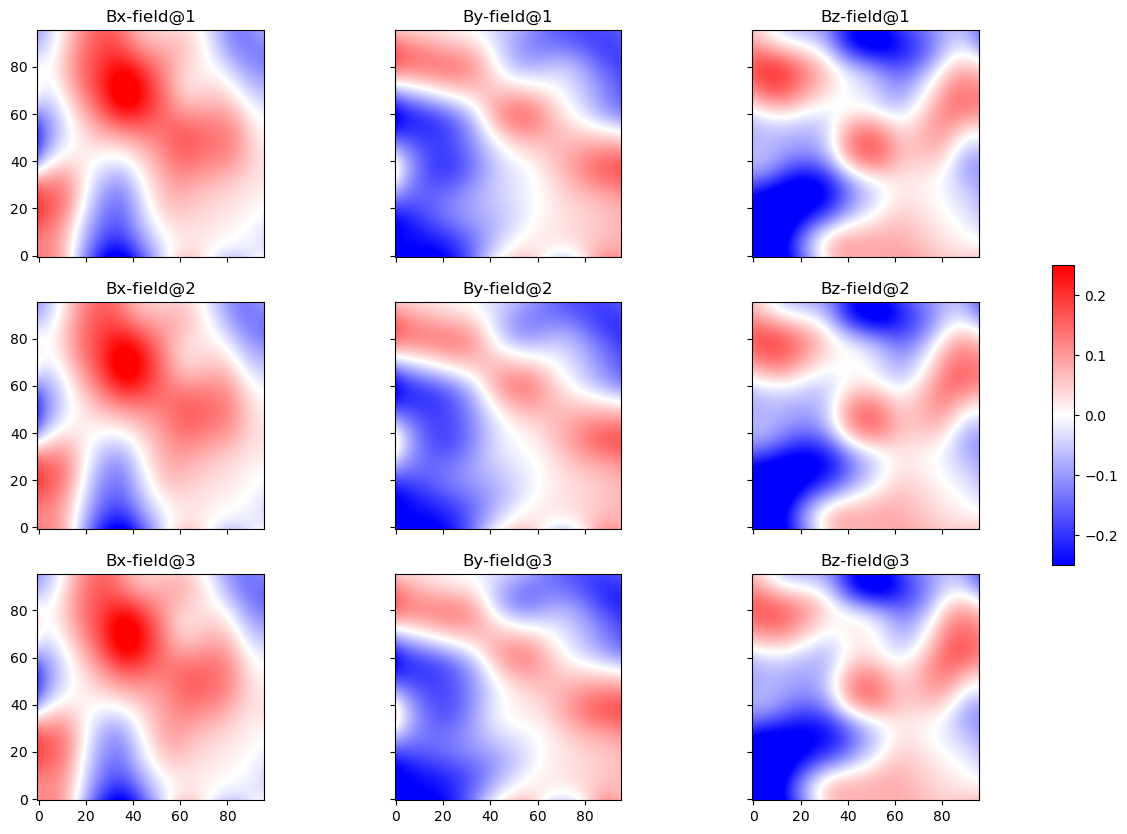

Divergence: 7.850277324905619e-05
Curl: 3.850436405627988e-05


<Figure size 640x480 with 0 Axes>

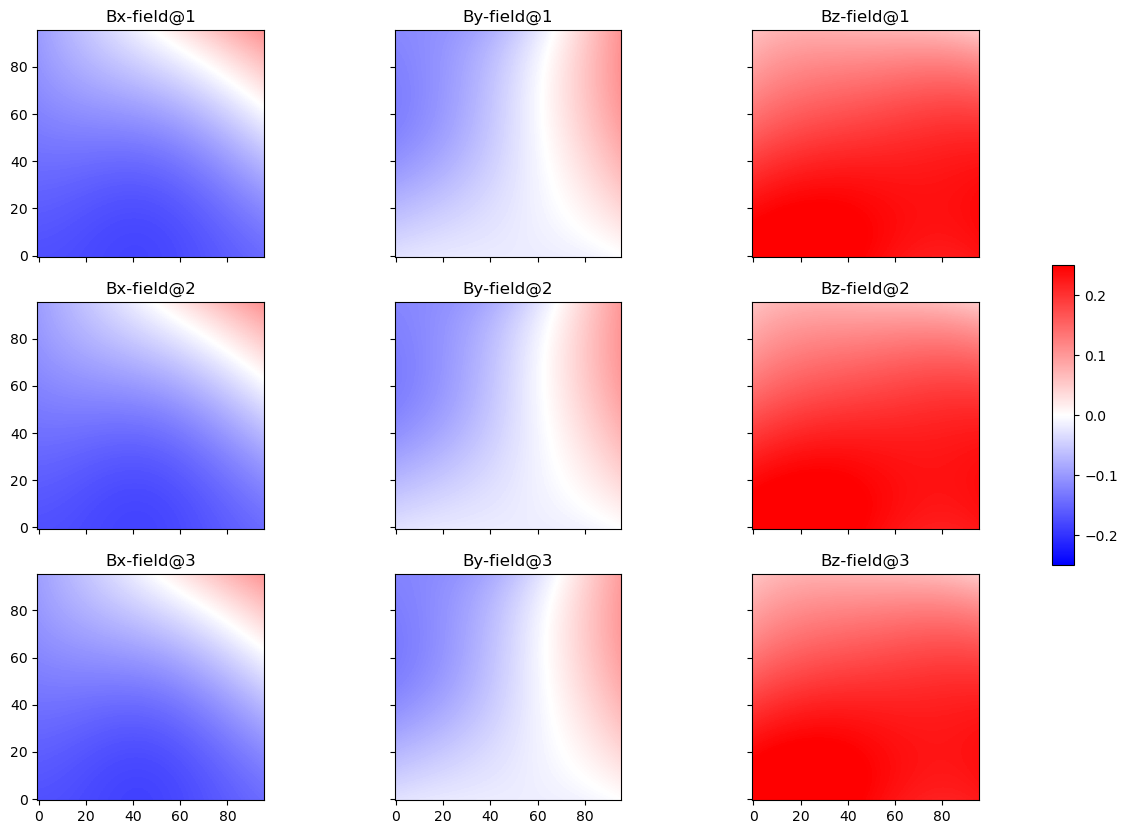

Divergence: 1.53632845467655e-05
Curl: 8.580747817177325e-06


<Figure size 640x480 with 0 Axes>

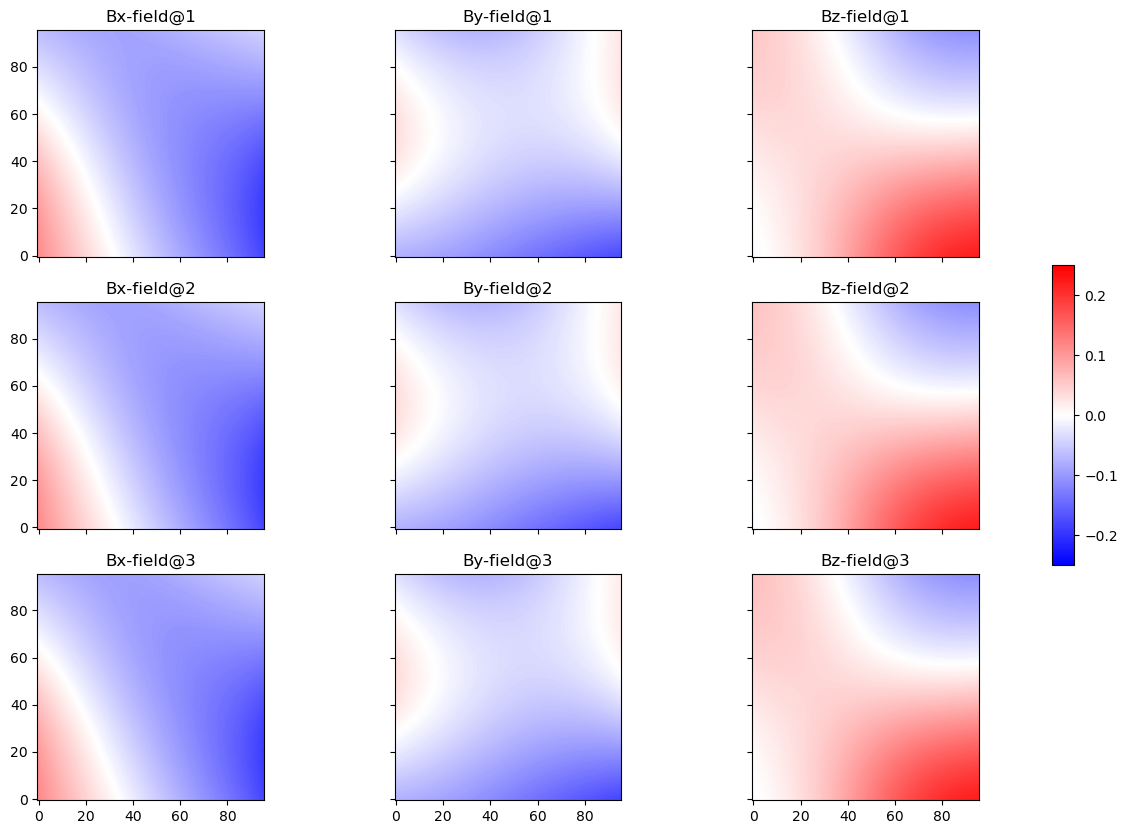

Divergence: 1.3602724720840342e-05
Curl: 1.0326165465812664e-05


In [7]:
for i in range(3):
    field_3D = db_3D['field'][i]
    plot_magfield(field_3D, vmax=0.25)
    print(f'Divergence: {abs(div(field_3D)).mean()}')
    print(f'Curl: {abs(curl(field_3D)).mean()}')

In [8]:
db.close()
db_3D.close()

### Test with fields of shape (3, 256, 256, 3)

(3, 256, 256, 3)


<Figure size 640x480 with 0 Axes>

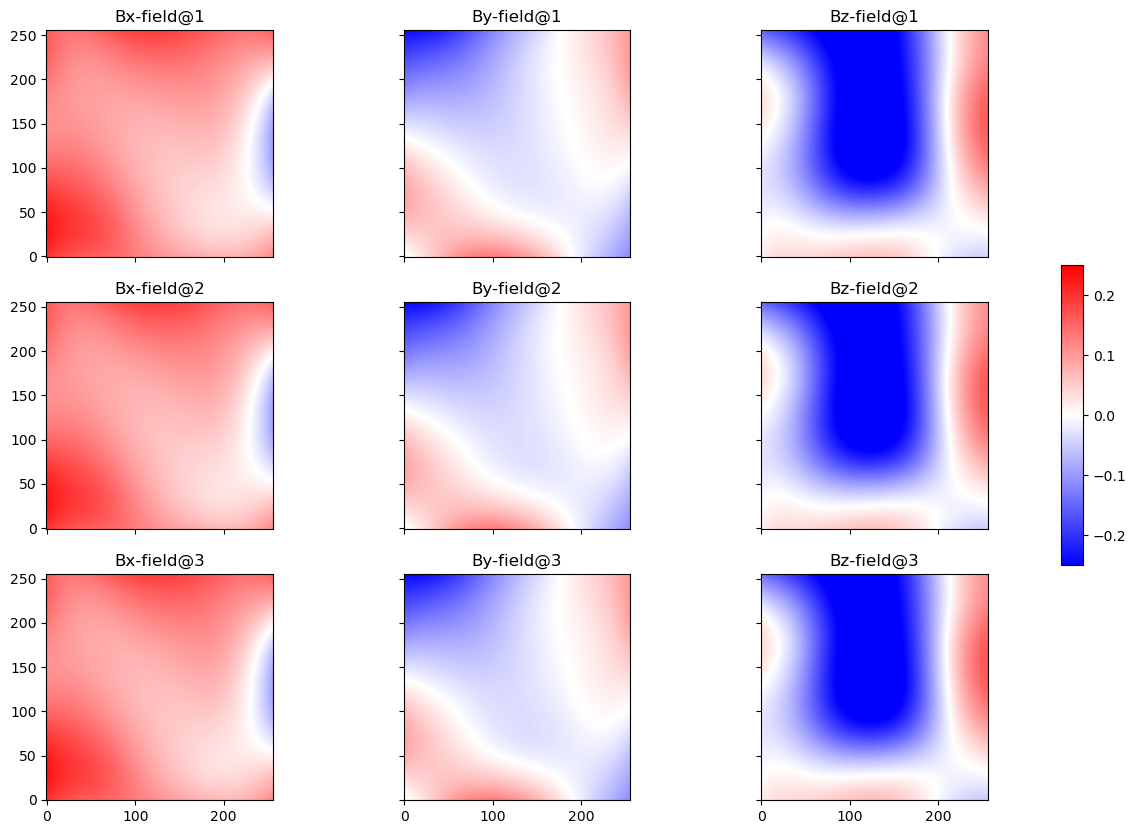

Divergence: 5.026547114539426e-06
Curl: 4.371260274638189e-06


<Figure size 640x480 with 0 Axes>

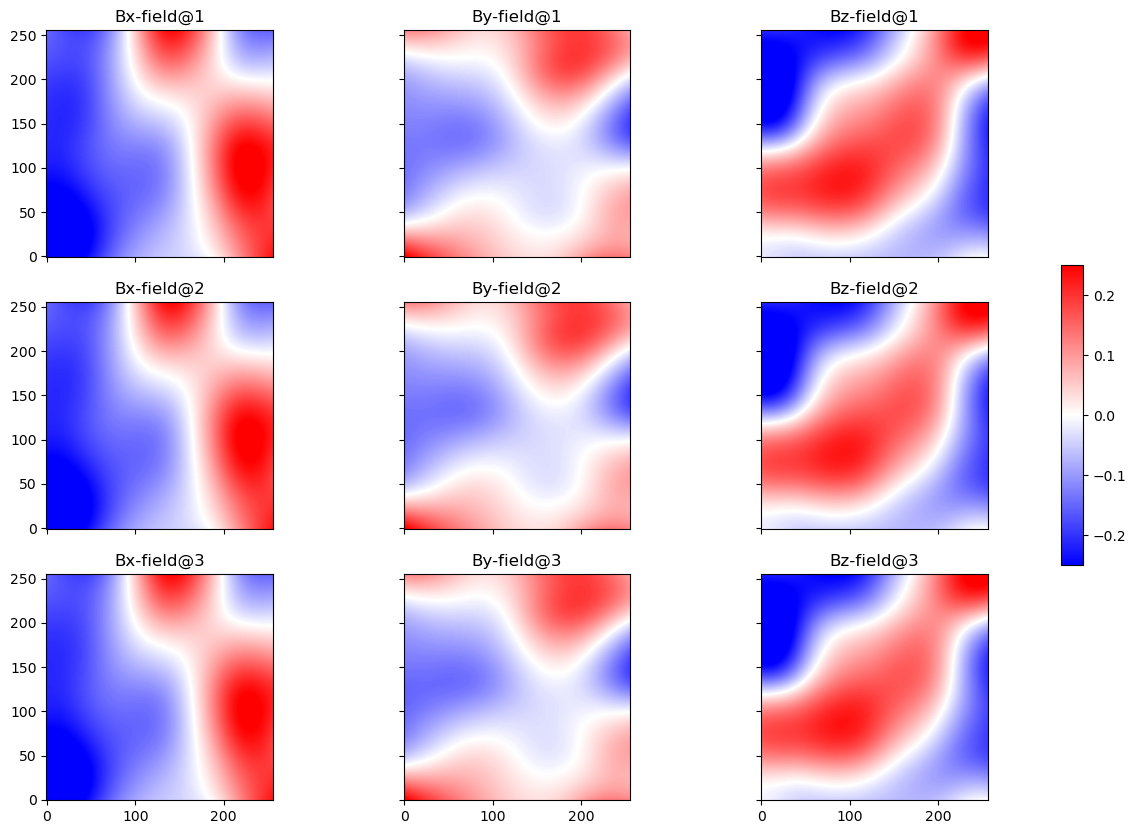

Divergence: 9.332180525234435e-06
Curl: 5.64972469874192e-06


<Figure size 640x480 with 0 Axes>

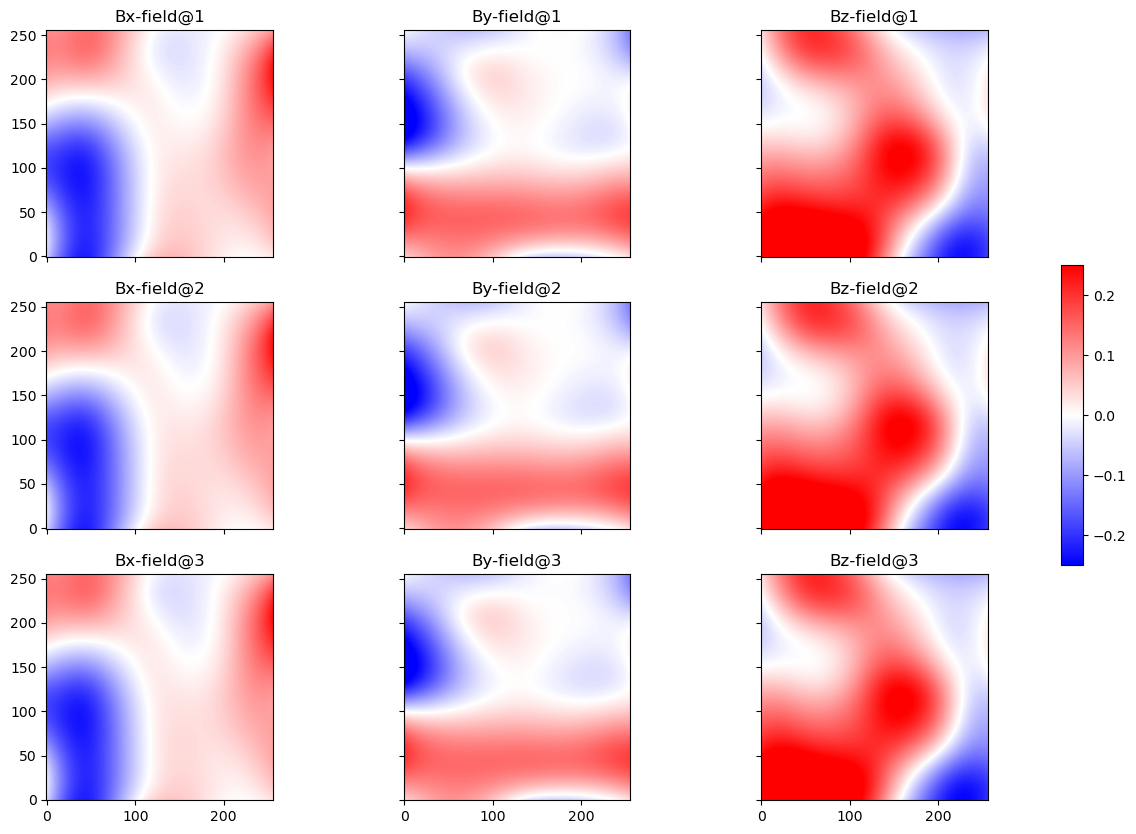

Divergence: 8.317369065480307e-06
Curl: 4.661237198888557e-06


In [9]:
db_256 = h5py.File('/home/dlcourse/magfield_256.h5')
print(db_256['field'][0].shape)
for i in range(3):
    field_256 = db_256['field'][i]
    plot_magfield(field_256, vmax=0.25)
    print(f'Divergence: {abs(div(field_256)).mean()}')
    print(f'Curl: {abs(curl(field_256)).mean()}')
db_256.close()